In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

In [2]:
# Lê o arquivo CSV, especificando o separador e o decimal
df = pd.read_csv('../data/data.csv', sep=",", decimal=",")

In [3]:
# Seleciona as features e o alvo
X = df.drop('PRODUCAO', axis=1)
y = df['PRODUCAO']

In [4]:
# Codifica as variáveis categóricas
categorical_features = ['CIDADES', 'MESORREGIOES', 'MICRORREGIOES', 'ANO']
le = LabelEncoder()
for feature in categorical_features:
    X[feature] = le.fit_transform(X[feature])

In [5]:
# Divide em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# Treina o modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [7]:
# Faz predições
y_pred = model.predict(X_test)

In [8]:
# Avalia o modelo
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 250.80307142857137


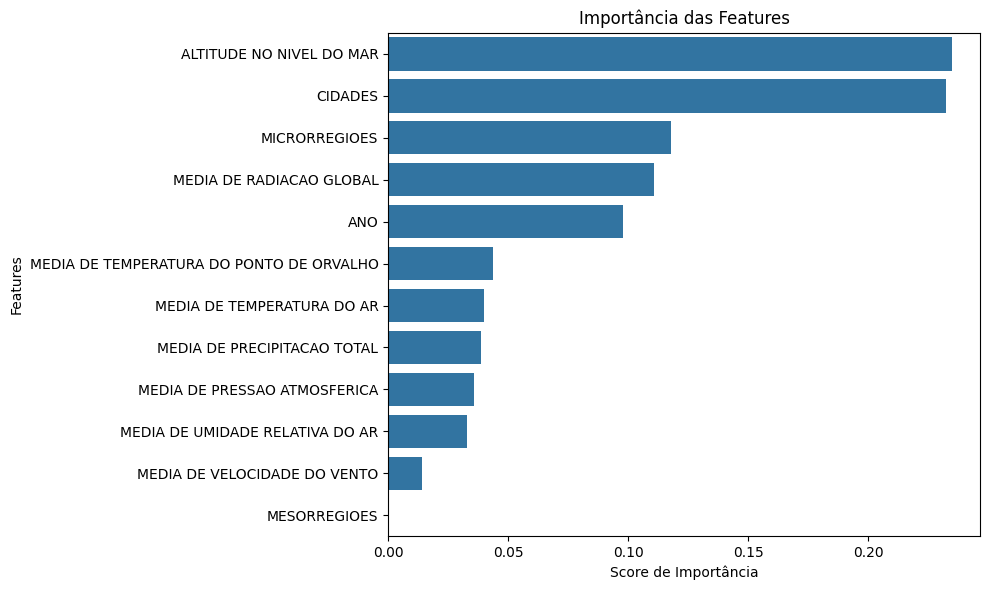

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtém as importâncias das features
importances = model.feature_importances_
features = X.columns

# Cria um DataFrame para facilitar a visualização
feat_importances = pd.Series(importances, index=features)
feat_importances = feat_importances.sort_values(ascending=False)

# Plota as importâncias
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title('Importância das Features')
plt.xlabel('Score de Importância')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

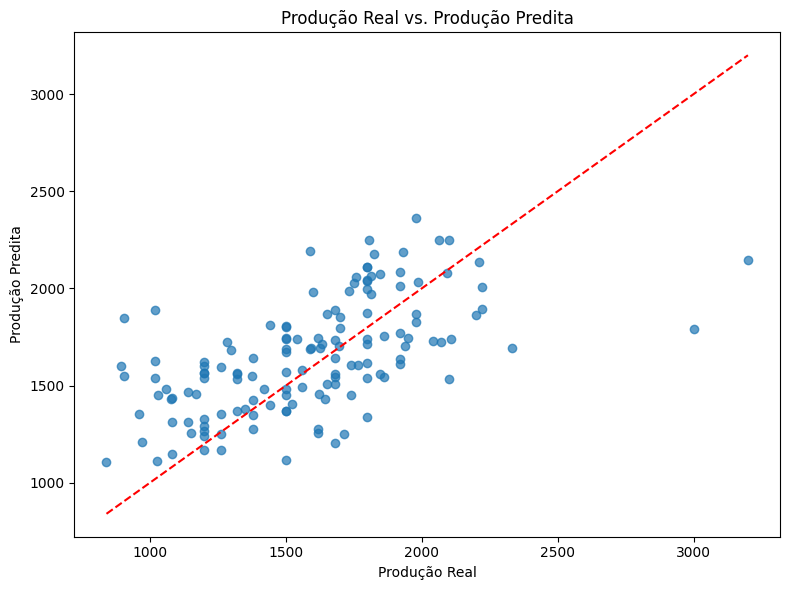

In [10]:
# Plota os valores reais versus preditos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Produção Real')
plt.ylabel('Produção Predita')
plt.title('Produção Real vs. Produção Predita')
plt.tight_layout()
plt.show()